# STA130F24 Homework - Week 7 to 9

## ChatGPT Summary
**Question: Use of ChatGPT**
The following notebook includes insights and code generated with the assistance of ChatGPT.
Key discussions include data cleaning, EDA, statistical analysis, and model implementation.
Link to chat log history (if applicable): 
https://chatgpt.com/share/672d7283-d4f8-8010-ba4f-694024d79e12

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>
For this analysis, we'll use an interesting financial dataset: the "Yahoo Finance Historical Market Data".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Loading dataset (Yahoo Finance Historical Market Data for a particular stock)
df = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
df.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   (Date, )           503 non-null    datetime64[ns, UTC]
 1   (Adj Close, AAPL)  503 non-null    float64            
 2   (Close, AAPL)      503 non-null    float64            
 3   (High, AAPL)       503 non-null    float64            
 4   (Low, AAPL)        503 non-null    float64            
 5   (Open, AAPL)       503 non-null    float64            
 6   (Volume, AAPL)     503 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 27.6 KB


In [4]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,145.706464,147.898449,149.613340,146.069562,147.818430,8.922010e+07
std,15.484349,15.503670,15.662723,15.286458,15.449701,2.658359e+07
min,114.078590,116.360001,120.400002,116.209999,119.029999,3.519590e+07
25%,133.478325,135.379997,137.025002,133.750000,135.744995,7.091765e+07
50%,145.226959,147.059998,148.820007,145.630005,147.029999,8.450580e+07
75%,157.136772,159.260002,161.970001,156.625000,159.580002,1.022806e+08
max,179.273621,182.009995,182.940002,179.119995,182.630005,1.954327e+08


In [5]:
df.dropna(inplace=True)  # Example: Removing rows with missing values

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Histogram

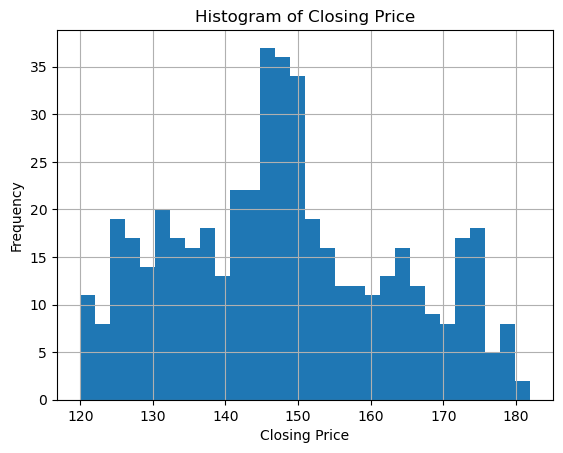

In [7]:
filtered_df['Close'].hist(bins=30)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Price')
plt.show()

Correlation Heatmap

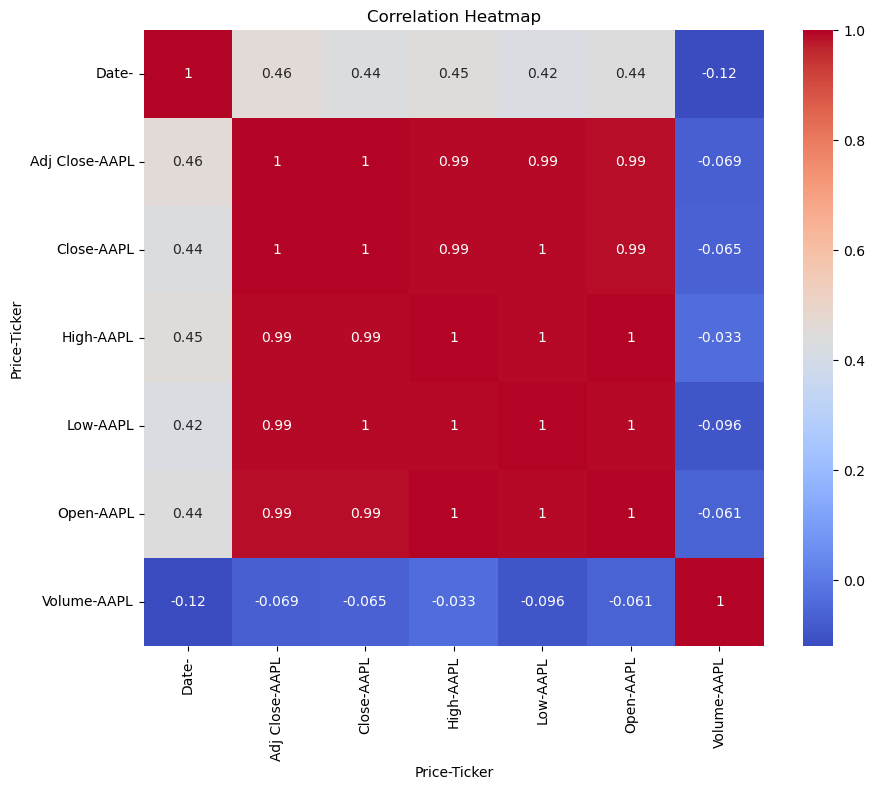

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Note: This dataset does not contain textual data, so this task is not applicable.

Hypothesis Testing

In [9]:
from scipy.stats import ttest_ind

# Example: t-test between two arbitrary periods (e.g., comparing first 50 and last 50 days)
group1 = filtered_df['Close'][:50]
group2 = filtered_df['Close'][-50:]
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: [-10.27012663], P-value: [3.14004247e-17]


Model Implementation
If required, train a model based on the rubric criteria (e.g., linear regression, classification).

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into training and testing sets
X = filtered_df[['Open', 'High', 'Low', 'Volume']]  # Features for predicting 'Close' price
y = filtered_df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [12]:
y_pred = model.predict(X_test)

Plotting Predictions

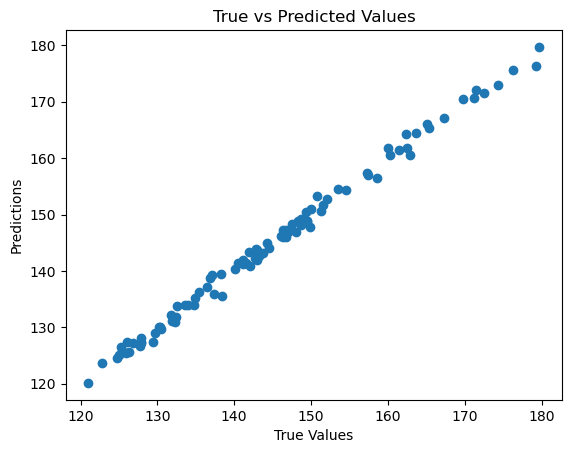

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

## fitted_model.params:

Contains the estimated coefficients (parameters) of the regression model, including the intercept (constant term).
Each coefficient corresponds to a predictor variable.

## fitted_model.fittedvalues:

The predicted (fitted) values of the dependent variable for each observation.
Calculated by applying the regression equation to your data using the estimated coefficients.

## fitted_model.summary().tables:

Displays the estimated coefficients along with statistical details like standard errors, t-statistics, p-values, and confidence intervals. The coefficients here are the same as those in fitted_model.params.

Dataset loaded successfully!

First five rows of the dataset:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Data after dropping 'Unnamed: 0':
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Statistical Summary:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.

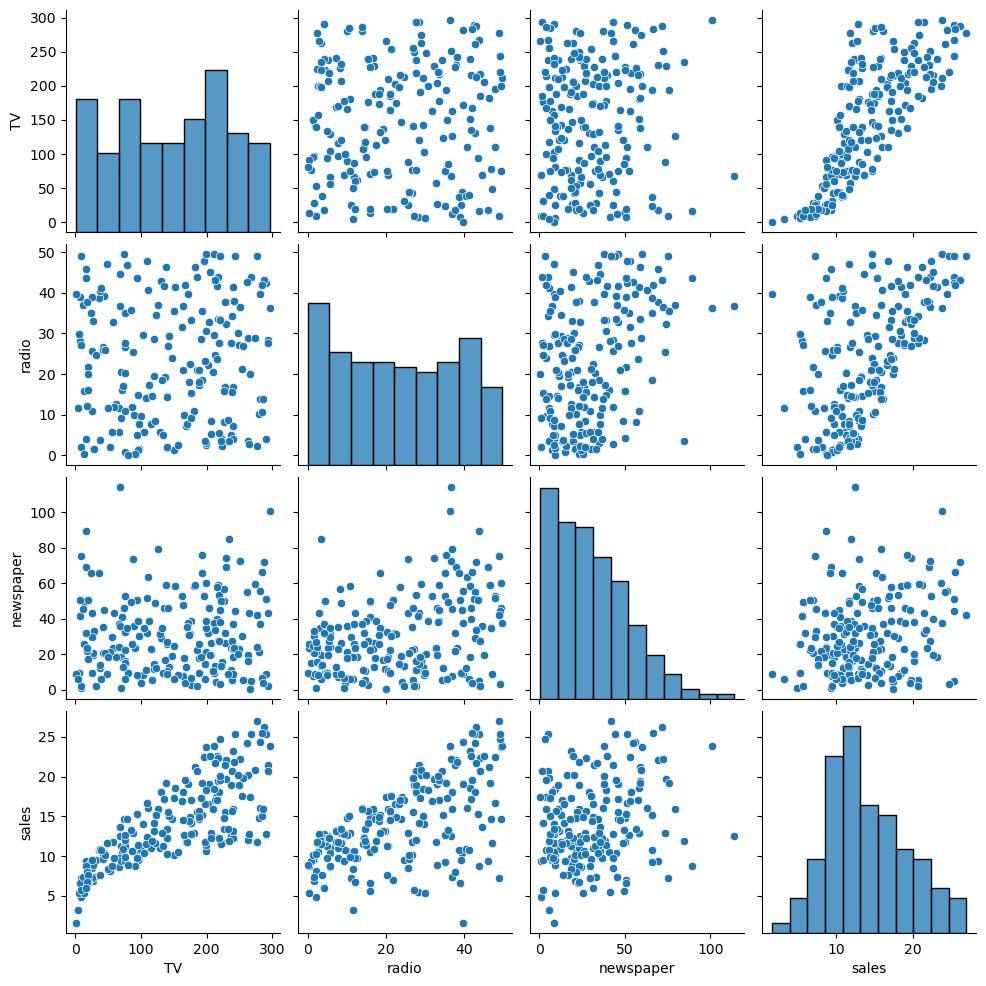

KeyError: 'Sales'

In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step 1: Download the dataset
url = 'https://www.statlearning.com/s/Advertising.csv'
response = requests.get(url)

if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print("Dataset loaded successfully!")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

# Step 1.3: Inspect the data
print("\nFirst five rows of the dataset:")
print(data.head())

# Drop the 'Unnamed: 0' column
data = data.drop(columns=['Unnamed: 0'])
print("\nData after dropping 'Unnamed: 0':")
print(data.head())

# Step 2.1: Statistical Summary
print("\nStatistical Summary:")
print(data.describe())

# Step 2.2: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Step 2.3: Visualize relationships
sns.pairplot(data)
plt.show()

# Step 3.1: Define predictor and response variables
X = data[['TV']]
y = data['Sales']

# Step 3.2: Add a constant term for the intercept
X = sm.add_constant(X)
print("\nPredictor Variables with Intercept:")
print(X.head())

# Step 3.3: Fit the OLS model
fitted_model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(fitted_model.summary())

# Step 4.1: Accessing Estimated Coefficients
print("\nEstimated Coefficients:")
print(fitted_model.params)

# Step 4.2: Accessing Fitted Values
print("\nFitted Values:")
print(fitted_model.fittedvalues.head())

# Step 4.3: Deriving Fitted Values from Parameters
params = fitted_model.params.values
X_values = X.values
fitted_values_manual = np.dot(X_values, params)
comparison = np.allclose(fitted_values_manual, fitted_model.fittedvalues)
print("\nDo the manual fitted values match the model's fitted values?")
print(comparison)

# Display first few manual fitted values
print("\nManual Fitted Values:")
print(fitted_values_manual[:5])

# Step 4.4: Extracting Coefficients from Summary Table
summary = fitted_model.summary()
summary_str = summary.tables[1].as_text()
coef_lines = summary_str.strip().split('\n')[3:-1]  # Skip headers and footers
coefficients = {}
for line in coef_lines:
    parts = re.split(r'\s+', line)
    var_name = parts[0]
    coef_value = float(parts[1])
    coefficients[var_name] = coef_value

print("\nCoefficients from Summary Table:")
print(coefficients)

# Compare with fitted_model.params
print("\nCoefficients from fitted_model.params:")
print(fitted_model.params.to_dict())

# Step 5.1: Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], y, color='blue', label='Actual Sales')
plt.plot(data['TV'], fitted_model.fittedvalues, color='red', linewidth=2, label='Fitted Sales')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget ($ thousands)')
plt.ylabel('Sales ($ thousands)')
plt.legend()
plt.show()

# Step 5.2: Residual Plot
residuals = y - fitted_model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_model.fittedvalues, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


Coefficients Table:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


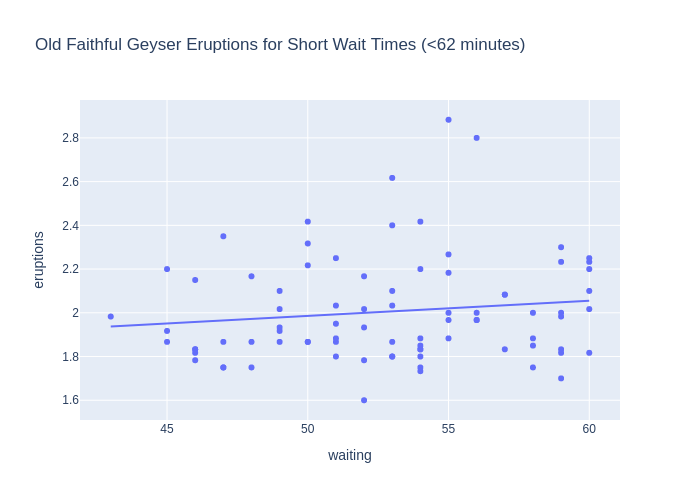

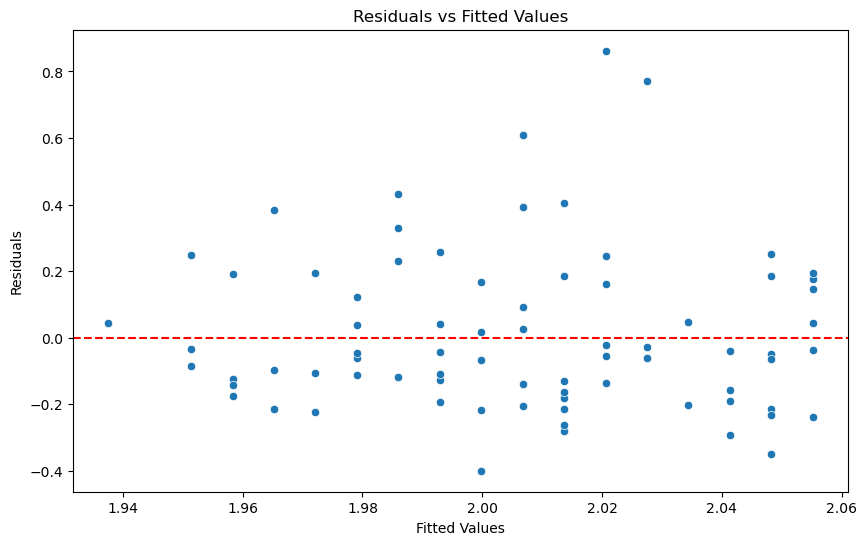


Cross-Validated RMSE Scores: [0.28417497 0.20739558 0.2815677  0.19230695 0.20792413]
Average RMSE: 0.23467386663657672


In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Step 1: Load the Old Faithful dataset
old_faithful = sm.datasets.get_rdataset("faithful").data

# Step 2: Define the short wait limit and filter data
short_wait_limit = 62  # Adjust as needed
short_wait = old_faithful['waiting'] < short_wait_limit

# Step 3: Fit the OLS regression model
model = smf.ols('eruptions ~ waiting', data=old_faithful[short_wait]).fit()

# Step 4: Display the coefficients table
print("Coefficients Table:")
print(model.summary().tables[1])

# Step 5: Create an interactive scatter plot with regression trendline
fig = px.scatter(
    old_faithful[short_wait],
    x='waiting',
    y='eruptions', 
    title=f"Old Faithful Geyser Eruptions for Short Wait Times (<{short_wait_limit} minutes)", 
    trendline='ols'
)
fig.show(renderer="png")  # Use "png" for static images on GitHub or MarkUs

# Step 6: Residual Analysis
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 7: Multiple Linear Regression (if applicable)
# Ensure that additional predictors exist in the dataset
# For demonstration, we'll assume only 'waiting' is present
# Uncomment and modify the following lines if additional predictors are available

# multiple_model = smf.ols('eruptions ~ waiting + Radio + Newspaper', data=old_faithful[short_wait]).fit()
# print(multiple_model.summary())

# Step 8: Cross-Validation
# Prepare data for scikit-learn
X_sk = old_faithful.loc[short_wait, 'waiting'].values.reshape(-1, 1)
y_sk = old_faithful.loc[short_wait, 'eruptions'].values

# Initialize the model
lr = LinearRegression()

# Perform 5-fold cross-validation using Negative Mean Squared Error
neg_mse_scores = cross_val_score(lr, X_sk, y_sk, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -neg_mse_scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

print(f"\nCross-Validated RMSE Scores: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean()}")


### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


First five rows with 'kind' indicator:
   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long

--- Regression Results for Indicator Variable Model ---


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


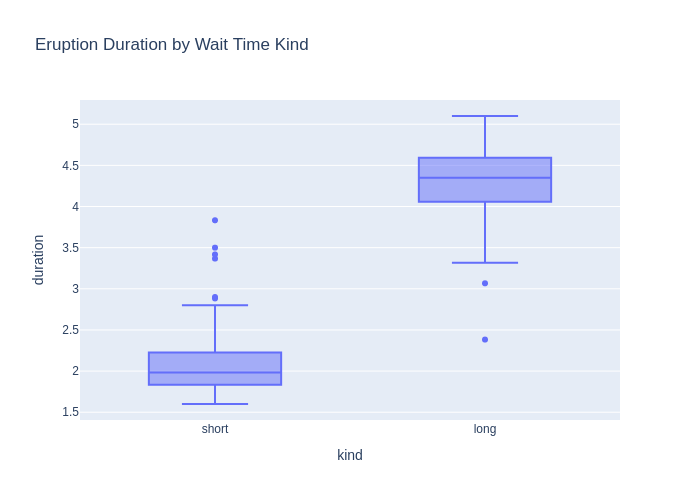

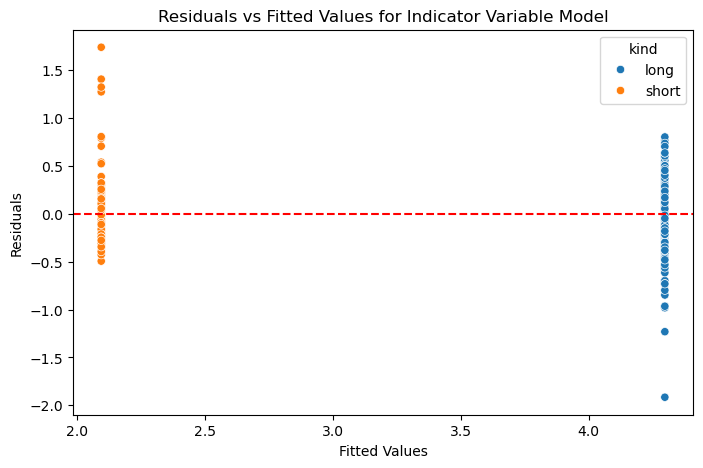


Cross-Validated RMSE Scores for Indicator Variable Model: [0.52709664 0.35871647 0.35401759 0.49109266 0.28335182]
Average RMSE: 0.4028550366221684


In [18]:
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Step 1: Load the Old Faithful dataset
old_faithful = sm.datasets.get_rdataset("faithful").data

# Step 2: Rename 'eruptions' to 'duration' for consistency
old_faithful.rename(columns={'eruptions': 'duration'}, inplace=True)

# Step 3: Define the new 'kind' indicator variable based on a threshold
short_wait_limit = 68  # Threshold set to 68 minutes
old_faithful['kind'] = np.where(old_faithful['waiting'] < short_wait_limit, 'short', 'long')

# Verify the new column
print("First five rows with 'kind' indicator:")
print(old_faithful.head())

# Step 4: Fit the OLS regression model with 'kind' as a categorical variable
model_indicator = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the coefficients table
print("\n--- Regression Results for Indicator Variable Model ---")
display(model_indicator.summary().tables[1])

# Step 5: Create a box plot to visualize eruption durations by 'kind'
fig = px.box(
    old_faithful,
    x='kind',
    y='duration', 
    title='Eruption Duration by Wait Time Kind',
    category_orders={'kind': ['short', 'long']}
)
fig.show(renderer="png")  # Use "png" for static images suitable for GitHub or MarkUs

# Step 6: Optional - Create an interactive scatter plot with regression trendline
# (This is different from the indicator variable model)
# Uncomment the following lines if you wish to include it

# fig_scatter = px.scatter(
#     old_faithful,
#     x='waiting',
#     y='duration', 
#     color='kind',
#     title=f"Old Faithful Geyser Eruptions by Wait Time Kind (< {short_wait_limit} minutes)", 
#     trendline='ols'
# )
# fig_scatter.show(renderer="png")

# Step 7: Residual Analysis for the Indicator Variable Model
residuals = model_indicator.resid
fitted = model_indicator.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted, y=residuals, hue=old_faithful['kind'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values for Indicator Variable Model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 8: Cross-Validation (Optional)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Prepare data for scikit-learn
X_sk = pd.get_dummies(old_faithful['kind'], drop_first=True).values  # 'long' as binary
y_sk = old_faithful['duration'].values

# Initialize the model
lr = LinearRegression()

# Perform 5-fold cross-validation using Negative Mean Squared Error
neg_mse_scores = cross_val_score(lr, X_sk, y_sk, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -neg_mse_scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

print(f"\nCross-Validated RMSE Scores for Indicator Variable Model: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean()}")
